In [2]:
from prophet import Prophet

In [3]:
import pandas as pd

In [4]:
data = cocacola_df = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [5]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
def convert_to_datetime_custom(text):
  """Converts a custom format (e.g., "Q1_YY") to datetime in pandas.

  Args:
      text: The string in the custom format.

  Returns:
      A pandas Series of datetime objects or None for invalid values.
  """
  # Implement your custom logic here, considering potential formats and error handling
  # This might involve string manipulation, dictionaries, or conditional statements
  # ...

  # Example (replace with your actual conversion logic)
  stri = str(text)
  # print(stri)
  # if text.any():
  quarter = int(stri.split("_")[0][1])
  # print(quarter)
  year = int(stri.split("_")[1])
  # Assuming first month of each quarter: March, June, September, December
  month = (quarter - 1) * 3 + 3
  # print(text.str.split("_")[0][1])
  return pd.to_datetime(f"{year}-{month}-01")
  # else:
  #   return None



In [7]:
data["Quarter"] = data["Quarter"].apply(convert_to_datetime_custom)
# df = data.apply(convert_to_datetime_custom, axis=0)
# print(df)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     datetime64[ns]
 1   Sales    42 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


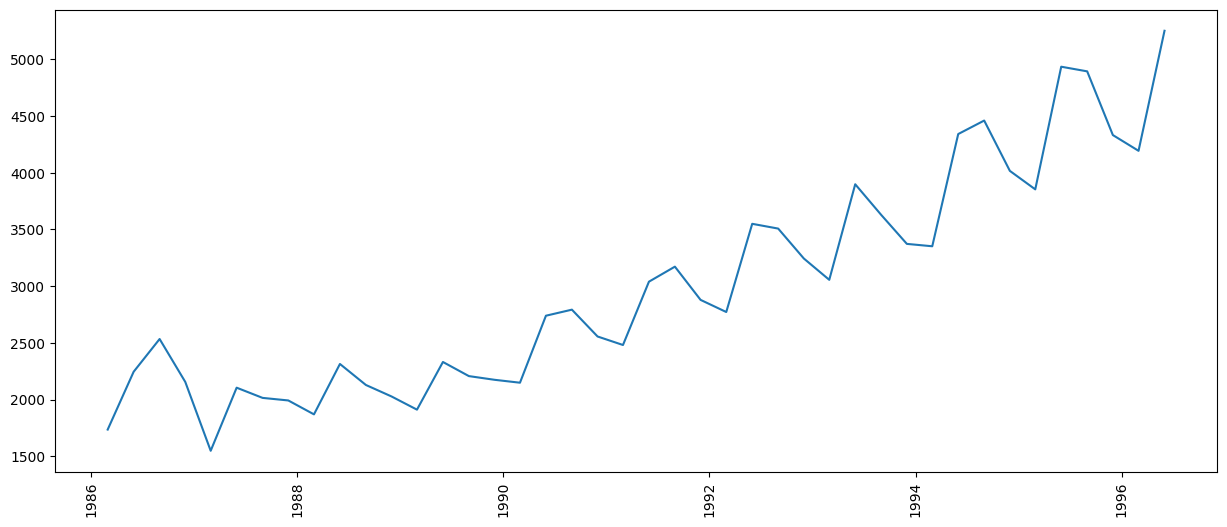

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Quarter'],data['Sales'])
plt.xticks(rotation='vertical')
plt.show()

In [10]:
m = Prophet()
data.columns = ['ds','y']

In [11]:
model = m.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5xhd067e/s5o16ppq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5xhd067e/cg79stqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94872', 'data', 'file=/tmp/tmp5xhd067e/s5o16ppq.json', 'init=/tmp/tmp5xhd067e/cg79stqm.json', 'output', 'file=/tmp/tmp5xhd067e/prophet_modelixar7qdj/prophet_model-20240506212554.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:25:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=10000,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10037,2023-10-14,10962.774675,40954.589561,46608.402281,8266.442010,13926.818018,32652.947416,32652.947416,32652.947416,32652.947416,32652.947416,32652.947416,0.0,0.0,0.0,43615.722091
10038,2023-10-15,10963.824863,40102.011104,45817.365031,8267.232387,13928.367939,31855.504287,31855.504287,31855.504287,31855.504287,31855.504287,31855.504287,0.0,0.0,0.0,42819.329150
10039,2023-10-16,10964.875052,38679.850001,44350.406012,8268.017936,13929.917859,30443.218792,30443.218792,30443.218792,30443.218792,30443.218792,30443.218792,0.0,0.0,0.0,41408.093844
10040,2023-10-17,10965.925240,36671.968061,42450.927752,8268.603171,13931.467780,28466.371300,28466.371300,28466.371300,28466.371300,28466.371300,28466.371300,0.0,0.0,0.0,39432.296540
10041,2023-10-18,10966.975428,34206.535144,39910.384633,8269.188406,13933.017700,25985.883965,25985.883965,25985.883965,25985.883965,25985.883965,25985.883965,0.0,0.0,0.0,36952.859394


In [ ]:
# forecast['subs_lower'] = forecast['yhat'].cumsum()

In [ ]:
# forecast = forecast[['ds','yhat_lower']]

In [ ]:
# final = forecast[(forecast['ds'] > '2022-06-30') & (forecast['ds'] < '2023-01-01')][['ds','yhat_lower']]

In [ ]:
# final['month'] = final['ds'].dt.month_name()

In [ ]:
# print(final['yhat_lower'].sum())
# final.groupby('month').sum().sort_values('yhat_lower')

0.0


TypeError: datetime64 type does not support sum operations

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)

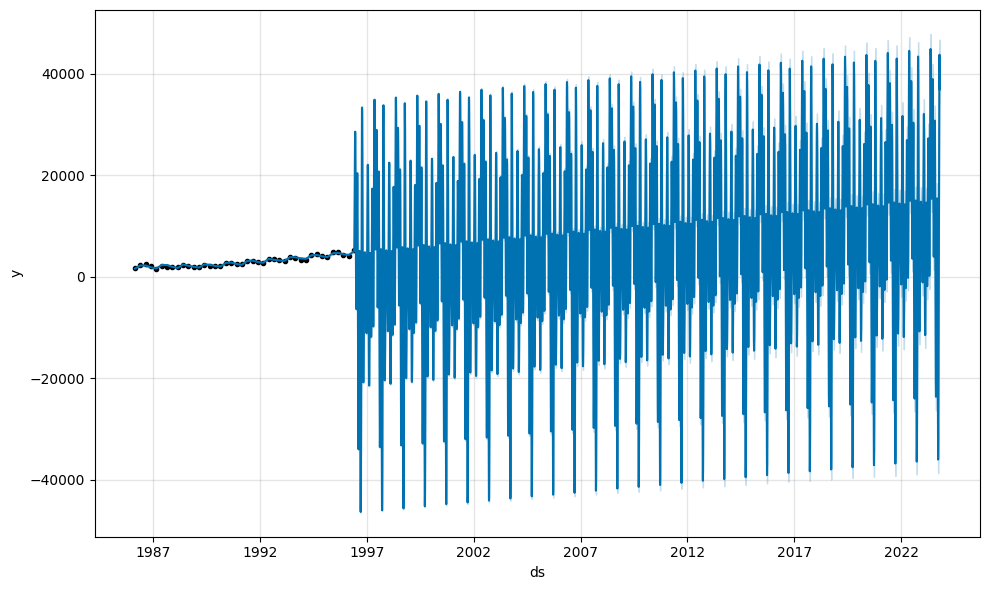

In [15]:
fig1 = m.plot(forecast)

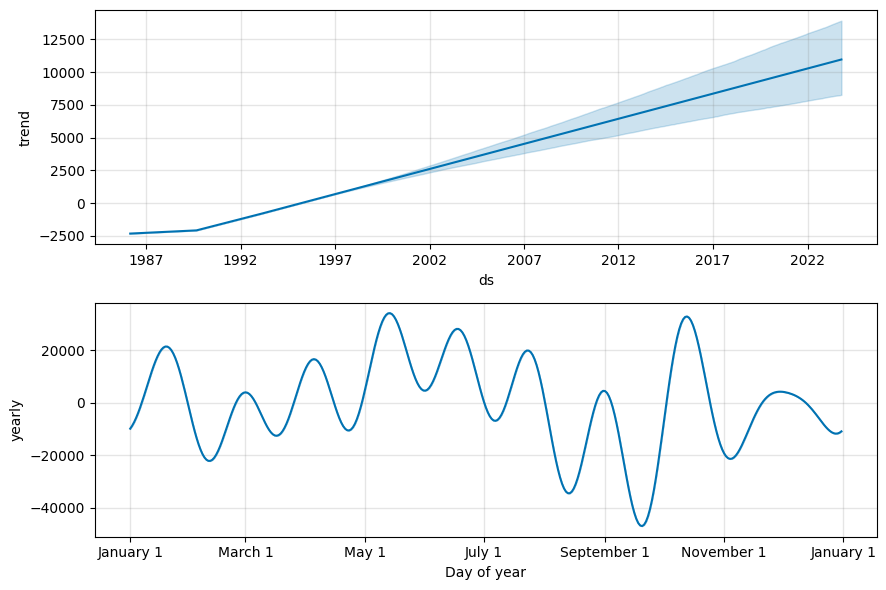

In [14]:
fig2 = m.plot_components(forecast)